In [11]:
import numpy as np
import matplotlib.pyplot as plt

#make unit circle
npts_fit = 1000
rad_fit = np.arange(npts_fit)*2*np.pi/(npts_fit)
xunit = np.cos(rad_fit)
yunit = np.sin(rad_fit)

#make grid
ngrid = 4
p = (np.arange(ngrid+1)-ngrid/2.)*2./ngrid
q = np.array([-1,1])

def transform(skew_mat):
    #plot
    lw = 0.3
    for i in p:
        r = np.array([i,i])
        plt.plot(q,r,color='g',linewidth=lw)
        plt.plot(r,q,color='g',linewidth=lw)
        plt.plot(q*skew[0,0]+r*skew[0,1],q*skew[1,0]+r*skew[1,1],color='b',linewidth=lw)
        plt.plot(r*skew[0,0]+q*skew[0,1],r*skew[1,0]+q*skew[1,1],color='b',linewidth=lw)

    plt.plot(xunit,yunit,color='g',linewidth=1.5)
    xskew = xunit*skew[0,0]+yunit*skew[0,1]
    yskew = xunit*skew[1,0]+yunit*skew[1,1]
    plt.plot(xskew,yskew,color='b',linewidth=1.5)
    plt.axis('equal')
    plt.show()

    

$$
R(\theta) = \left( \begin{array}{cc}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta \end{array} \right)\\
$$

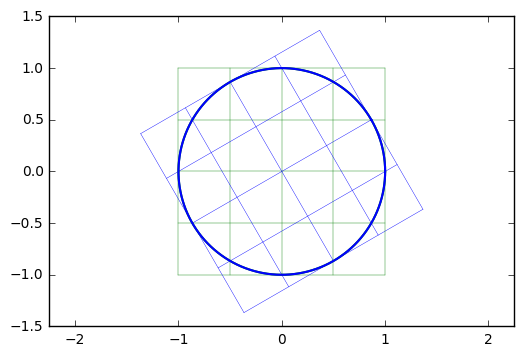

In [12]:
angle = np.radians(30)
skew = np.array([[np.cos(angle),-np.sin(angle)],
                 [np.sin(angle),np.cos(angle)]])

transform(skew)


$$
R(\theta) = \left( \begin{array}{cc}
1 & -\sin\theta \\
\sin\theta & 1 \end{array} \right)\\
$$

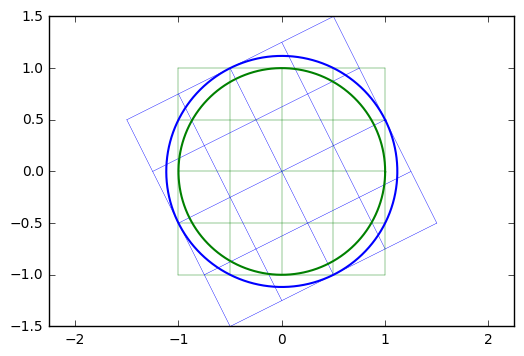

In [25]:
angle = np.radians(30)
skew = np.array([[1,-np.sin(angle)],
                 [np.sin(angle),1]])

transform(skew)


$$
R(\theta) = \left( \begin{array}{cc}
1 & \sin\theta \\
\sin\theta & 1 \end{array} \right)\\
$$

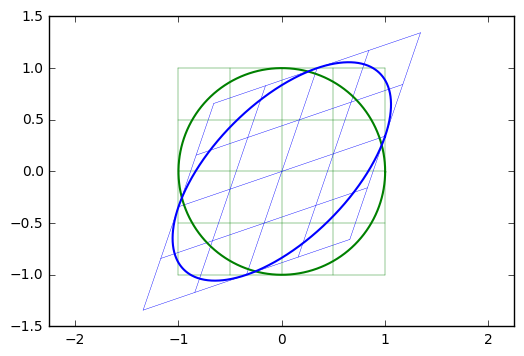

In [29]:
angle = np.radians(20)
skew = np.array([[1,np.sin(angle)],
                 [np.sin(angle),1]])

transform(skew)


In [58]:
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = np.genfromtxt("https://raw.githubusercontent.com/andrewkruger/Magnetometer_calibration/master/3d_soft.txt", unpack=True)
ax.set_aspect('equal')
ax.autoscale_view(tight=True)
ax.scatter(X, Y, Z)

# initialization function: plot the background of each frame
def init():
    return ()


# animation function. This is called sequentially
def animate(i):
    ax.view_init(np.sin(i*np.pi/100)*30, i*3.6)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=100, blit=True)

HTML(anim.to_html5_video())